# WNBA Playing Time Distributions
Gracie Maulik and Carly Martin

## Set Up

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Regular Season Data

The data used in this project is taken from the WNBA Statistics page, the official website for all of the league’s statistics. The variable of interest is `MIN`, the average number of minutes a player played per game that season. First each separate dataset was downloaded.

In [ ]:
file1 = '/content/drive/MyDrive/Senior Year/data science/Final Project/WNBA Season Stats - Final.xlsx'

df_season24 = pd.read_excel(file1, sheet_name='2024 Regular Season Data')
df_season23 = pd.read_excel(file1, sheet_name='2023 Regular Season Data')
df_season22 = pd.read_excel(file1, sheet_name='2022 Regular Season Data')
df_season21 = pd.read_excel(file1, sheet_name='2021 Regular Season')
df_season20 = pd.read_excel(file1, sheet_name='2020 Regular Season Data')

For ease in the future the column `YEAR` was added to each to represent the WNBA season in which these stats are from. Additionally, the regular season ranking of each team was added to the dataset for each respective year in a column titled `RANK`.

In [ ]:
#Add column 'YEAR'
df_season24['YEAR'] = 2024
df_season23['YEAR'] = 2023
df_season22['YEAR'] = 2022
df_season21['YEAR'] = 2021
df_season20['YEAR'] = 2020

In [ ]:
#Add in season Ranking for 2024

# Add column RANK for 2024
team_ranks24 = {
    'NYL': 1, 'MIN': 2, 'CON': 3, 'LVA': 4, 'SEA': 5,
    'IND': 6, 'PHO': 7, 'ATL': 8, 'WAS': 9, 'CHI': 10,
    'DAL': 11, 'LAS': 12
}

df_season24['RANK'] = df_season24['TEAM'].map(team_ranks24).fillna(0).astype(int)

In [ ]:
# Add column RANK for 2023
team_ranks23 = {
    'NYL': 2, 'MIN': 6, 'CON': 3, 'LVA': 1, 'SEA': 11,
    'IND': 10, 'PHO': 12, 'ATL': 5, 'WAS': 7, 'CHI': 8,
    'DAL': 4, 'LAS': 9
}

df_season23['RANK'] = df_season23['TEAM'].map(team_ranks23).fillna(0).astype(int)

In [ ]:
# Add column RANK for 2022
team_ranks22 = {
    'NYL': 7, 'MIN': 9, 'CON': 3, 'LVA': 1, 'SEA': 4,
    'IND': 12, 'PHO': 8, 'ATL': 10, 'WAS': 5, 'CHI': 2,
    'DAL': 6, 'LAS': 11
}

df_season22['RANK'] = df_season22['TEAM'].map(team_ranks22).fillna(0).astype(int)

In [ ]:
# Add column RANK for 2021
team_ranks21 = {
    'NYL': 8, 'MIN': 3, 'CON': 1, 'LVA': 2, 'SEA': 4,
    'IND': 12, 'PHO': 5, 'ATL': 11, 'WAS': 9, 'CHI': 6,
    'DAL': 7, 'LAS': 10
}

df_season21['RANK'] = df_season21['TEAM'].map(team_ranks21).fillna(0).astype(int)

In [ ]:
# Add column RANK for 2020
team_ranks20 = {
    'NYL': 12, 'MIN': 4, 'CON': 7, 'LVA': 1, 'SEA': 2,
    'IND': 11, 'PHO': 5, 'ATL': 10, 'WAS': 8, 'CHI': 6,
    'DAL': 9, 'LAS': 3
}

df_season20['RANK'] = df_season20['TEAM'].map(team_ranks20).fillna(0).astype(int)

Each data frame was merged together and the variables not of interest were dropped. `ORDER`, `PLAYER`, `TEAM`, `MIN`, `GP`, `W`, `L`, `RANK` and `YEAR` were kept. The data was then sorted by year and team. Finally, the index was set to `TEAM` for ease of reading.

In [ ]:
# Merge dataFrames
df = pd.concat([df_season24, df_season23, df_season22, df_season21, df_season20], ignore_index=True)
df.head()

,ORDER,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,BLK,PF,FP,DD2,TD3,+/-,YEAR,RANK,15:00:00,NaN
0,1,Arike Ogunbowale,DAL,27,38,9,29,38.6,22.2,7.3,...,0.3,2.8,39.7,2,0,-6.6,2024,11,NaN,NaN
1,2,Caitlin Clark,IND,22,40,20,20,35.4,19.2,6.1,...,0.7,2.8,40.4,14,2,-1.6,2024,6,NaN,NaN
2,3,Napheesa Collier,MIN,28,34,27,7,34.7,20.4,7.9,...,1.4,2.6,41.1,18,0,9.2,2024,2,NaN,NaN
3,4,A'ja Wilson,LVA,28,38,26,12,34.4,26.9,10.1,...,2.6,1.8,50.3,23,0,4.6,2024,4,NaN,NaN
4,5,Satou Sabally,DAL,26,15,3,12,34.2,17.9,5.9,...,0.5,3.2,35.5,0,0,-3.5,2024,11,NaN,NaN


In [ ]:
#filter df to sort by YEAR column then TEAM column
df_sorted = df.sort_values(by=['YEAR', 'TEAM'])

# keep columns 'Order', 'PLAYER', 'TEAM', 'MIN', 'GP', 'W', 'L', 'RANK', 'YEAR'
df_min = df_sorted[['ORDER', 'PLAYER', 'TEAM', 'MIN', 'GP', 'W', 'L', 'RANK', 'YEAR']]
df_min.head()

# Set index as TEAM
df_min.set_index('TEAM', inplace=True)

#Playoff Data

The process was repeated for the playoff datasets.

In [ ]:
df_pf24 = pd.read_excel(file1, sheet_name='2024 Playoff Data')
df_pf23 = pd.read_excel(file1, sheet_name='2023 Playoff Data')
df_pf22 = pd.read_excel(file1, sheet_name='2022 Playoff Data')
df_pf21 = pd.read_excel(file1, sheet_name='2021 Playoff Data')
df_pf20 = pd.read_excel(file1, sheet_name='2020 Playoff Data')

# add YEAR
df_pf24['YEAR'] = 2024
df_pf23['YEAR'] = 2023
df_pf22['YEAR'] = 2022
df_pf21['YEAR'] = 2021
df_pf20['YEAR'] = 2020

# add RANK
df_pf24['RANK'] = df_pf24['TEAM'].map(team_ranks24).fillna(0).astype(int)
df_pf23['RANK'] = df_pf23['TEAM'].map(team_ranks23).fillna(0).astype(int)
df_pf22['RANK'] = df_pf22['TEAM'].map(team_ranks22).fillna(0).astype(int)
df_pf21['RANK'] = df_pf21['TEAM'].map(team_ranks21).fillna(0).astype(int)
df_pf20['RANK'] = df_pf20['TEAM'].map(team_ranks20).fillna(0).astype(int)

In [ ]:
df_pf = pd.concat([df_pf24, df_pf23, df_pf22, df_pf21, df_pf20], ignore_index=True)
df_pf.head()

,ORDER,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,YEAR,RANK
0,1,Napheesa Collier,MIN,28,12,7,5,38.8,23.8,8.8,...,2.6,2.1,1.9,3.0,45.0,3,0,2.9,2024,2
1,2,Alyssa Thomas,CON,32,7,4,3,38.7,14.9,6.4,...,2.6,1.0,0.0,2.4,34.1,5,1,1.7,2024,3
2,3,Kelsey Mitchell,IND,29,2,0,2,38.5,19.0,8.0,...,4.5,0.0,0.0,2.0,28.5,0,0,-13.0,2024,6
3,4,Caitlin Clark,IND,22,2,0,2,38.2,18.0,7.0,...,2.5,2.0,1.0,3.0,40.0,0,0,-13.0,2024,6
4,5,Breanna Stewart,NYL,30,11,8,3,37.4,19.4,6.9,...,2.4,1.5,1.7,1.8,39.9,5,0,5.1,2024,1


In [ ]:
#filter df to sort by YEAR column then TEAM column
df_sorted_pf = df_pf.sort_values(by=['YEAR', 'TEAM'])

# keep columns 'Order', 'PLAYER', 'TEAM', 'MIN', 'GP', 'W', 'L', 'RANK', 'YEAR'
df_min_pf = df_sorted_pf[['ORDER', 'PLAYER', 'TEAM', 'MIN', 'GP', 'W', 'L', 'RANK', 'YEAR']]
df_min_pf.head()

# Set index as TEAM
df_min_pf.set_index('TEAM', inplace=True)

,ORDER,PLAYER,MIN,GP,W,L,RANK,YEAR
TEAM,,,,,,,,
SEA,40,Mercedes Russell,23.1,2,0,2,5,2024
SEA,44,Jordan Horston,17.6,2,0,2,5,2024
SEA,67,Victoria Vivians,6.8,1,0,1,5,2024
SEA,78,Joyner Holmes,2.1,1,0,1,5,2024
SEA,82,Sami Whitcomb,1.6,1,0,1,5,2024


Additionally, the column `RANK` was added to each dataframe indicating whether or not the team won a championship that year.

In [ ]:
# Add column based on whether or not the team won a championship

df_min_pf['CHAMP'] = 'No'  # Initialize the column
df_min_pf.loc[(df_min_pf['YEAR'] == 2020) & (df_min_pf.index == 'SEA'), 'CHAMP'] = 'Yes'
df_min_pf.loc[(df_min_pf['YEAR'] == 2021) & (df_min_pf.index == 'CHI'), 'CHAMP'] = 'Yes'
df_min_pf.loc[(df_min_pf['YEAR'] == 2022) & (df_min_pf.index == 'LVA'), 'CHAMP'] = 'Yes'
df_min_pf.loc[(df_min_pf['YEAR'] == 2023) & (df_min_pf.index == 'LVA'), 'CHAMP'] = 'Yes'
df_min_pf.loc[(df_min_pf['YEAR'] == 2024) & (df_min_pf.index == 'NYL'), 'CHAMP'] = 'Yes'

<ipython-input-16-d1d1fd8e150f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_pf['CHAMP'] = 'No'  # Initialize the column


## Minutes Distribution across the whole league:

### Regular Season:

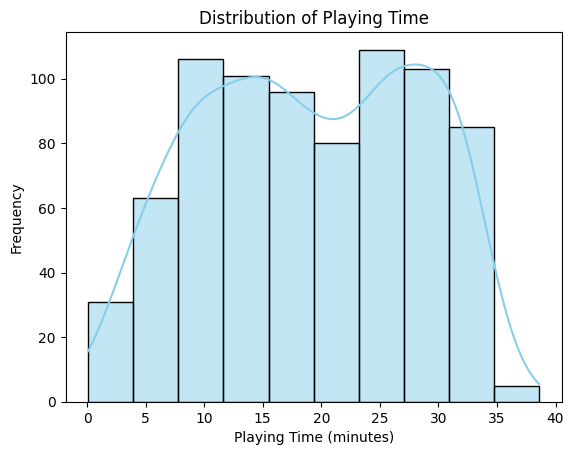

In [ ]:
# Create a histogram with seaborn
sns.histplot(df_min['MIN'], kde=True, bins=10, color='skyblue')

# Add labels and title
plt.title('Distribution of Playing Time')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Playoffs:

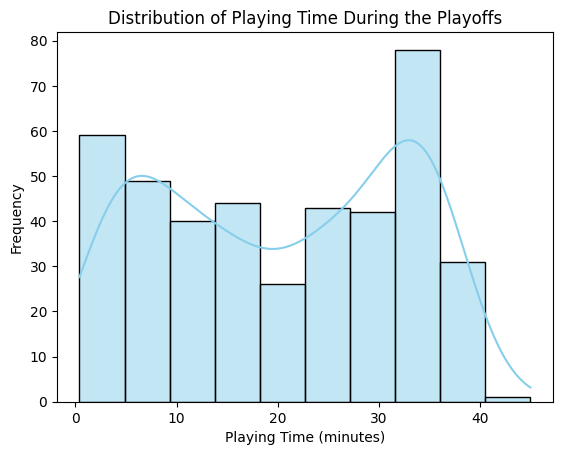

In [ ]:
# Create a histogram with seaborn
sns.histplot(df_min_pf['MIN'], kde=True, bins=10, color='skyblue')

# Add labels and title
plt.title('Distribution of Playing Time During the Playoffs')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Distribution of Number 1 Ranked teams


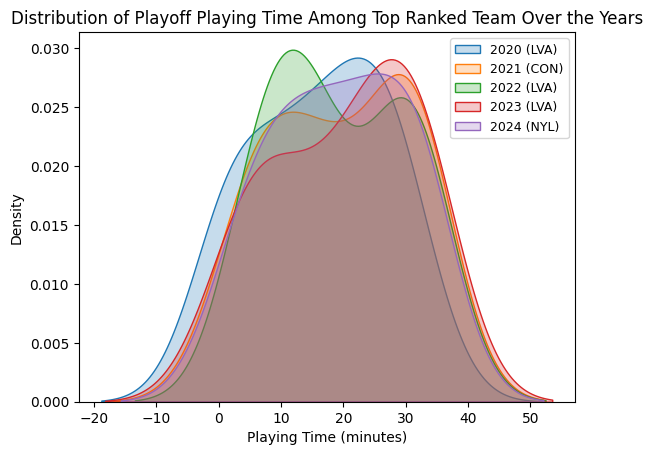

In [ ]:
df_rank1 = df_min[df_min['RANK'] == 1]

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_rank1['YEAR'].unique():
    # Get the team name for the current year using .loc and the index
    team = df_rank1.loc[df_rank1['YEAR'] == year].index[0]
    sns.kdeplot(
        data=df_rank1[df_rank1['YEAR'] == year],
        x='MIN',
        label=f"{year} ({team})",  # Include team in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time Among Top Ranked Team Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()


In [ ]:
df_rank1_sum0 = df_rank1['MIN'][df_rank1['YEAR'] == 2020].describe()
df_rank1_sum1 = df_rank1['MIN'][df_rank1['YEAR'] == 2021].describe()
df_rank1_sum2 = df_rank1['MIN'][df_rank1['YEAR'] == 2022].describe()
df_rank1_sum3 = df_rank1['MIN'][df_rank1['YEAR'] == 2023].describe()
df_rank1_sum4 = df_rank1['MIN'][df_rank1['YEAR'] == 2024].describe()

#merge dataframes horizontally
df_rank1_sum = pd.concat([df_rank1_sum0, df_rank1_sum1, df_rank1_sum2, df_rank1_sum3, df_rank1_sum4], axis=1)

# Change column names
df_rank1_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_rank1_sum

,2020,2021,2022,2023,2024
count,13.000000,12.000000,12.000000,11.000000,12.000000
mean,16.200000,19.525000,19.308333,20.063636,19.300000
std,10.698442,11.053188,10.541818,11.364354,10.619108
min,0.400000,3.200000,5.800000,2.900000,3.700000
25%,8.100000,9.050000,11.575000,10.150000,11.550000
50%,17.400000,18.750000,16.650000,22.500000,20.550000
75%,25.800000,30.300000,29.775000,31.100000,30.000000
max,31.700000,31.900000,33.200000,32.400000,32.700000


In [ ]:
df_rank1_sum.loc["std"].mean()

10.85538196307572

The teams that finished the regular season in first place have also had somewhat similar distributions of playing time. Each team had a decent balance of players who played 20-35 minutes per game and those who hovered around 10 minutes per game. Additionally, each distribution is quite wide with the average standard deviation among these teams being 10.86 minutes. The teams who finished the regular season in last place had an average standard deviation 7.74 minutes per game. In general, teams who finished the regular season in first place had a wider distribution of average minutes played per athlete, meaning that they were willing to play deeping into their rosters. This indicates that teams who ended up winning the league often had more depth than those towards the bottom of the rankings.


## Distribution of Number 12 Ranked teams


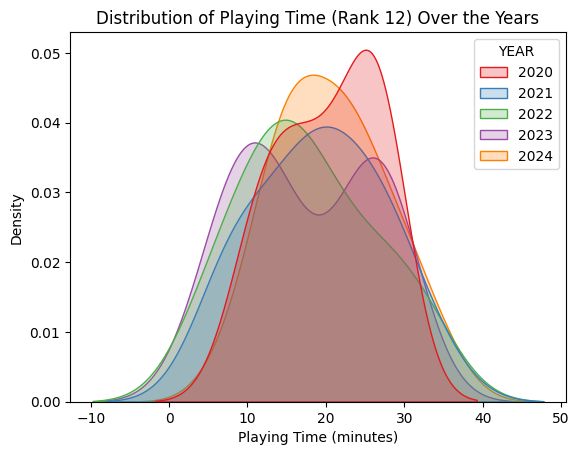

In [ ]:
df_rank12 = df_min[df_min['RANK'] == 12]

# Create the distribution plot for 'min' column by year
sns.kdeplot(data=df_rank12, x='MIN', hue='YEAR', fill=True, common_norm=False, palette='Set1')

# Add labels and title
plt.title('Distribution of Playing Time (Rank 12) Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the plot
plt.show()


In [ ]:
df_rank12_sum0 = df_rank12['MIN'][df_rank12['YEAR'] == 2020].describe()
df_rank12_sum1 = df_rank12['MIN'][df_rank12['YEAR'] == 2021].describe()
df_rank12_sum2 = df_rank12['MIN'][df_rank12['YEAR'] == 2022].describe()
df_rank12_sum3 = df_rank12['MIN'][df_rank12['YEAR'] == 2023].describe()
df_rank12_sum4 = df_rank12['MIN'][df_rank12['YEAR'] == 2024].describe()

#merge dataframes horizontally
df_rank12_sum = pd.concat([df_rank12_sum0, df_rank12_sum1, df_rank12_sum2, df_rank12_sum3, df_rank12_sum4], axis=1)

# Change column names
df_rank12_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_rank12_sum

,2020,2021,2022,2023,2024
count,12.000000,13.000000,14.000000,16.000000,14.000000
mean,20.258333,19.115385,17.621429,17.625000,20.614286
std,6.437738,8.155555,8.566049,8.532956,6.998885
min,10.000000,6.700000,5.400000,5.600000,8.900000
25%,14.875000,14.700000,12.825000,10.425000,15.750000
50%,21.000000,20.000000,16.300000,15.500000,21.050000
75%,26.225000,26.500000,23.150000,26.300000,24.450000
max,27.500000,33.100000,32.600000,29.000000,33.700000


In [ ]:
df_rank12_sum.loc["std"].mean()

7.738236615009264

Overall, there is no clear pattern of playing time distribution for teams who ranked last in the past 5 seasons. Some teams used the entirety of their bench, and some teams relied on their strongest players to do the work, but all of them have room for improvement in the coming years.


# Atlanta Dream

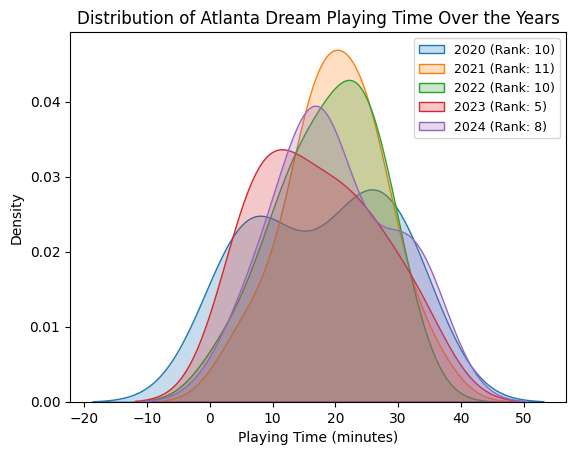

In [ ]:
df_ATL = df_min[df_min.index == 'ATL']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_ATL['YEAR'].unique():
    rank = df_ATL[df_ATL['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_ATL[df_ATL['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Atlanta Dream Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_ATL by year
df_ATL_sum0 = df_ATL['MIN'][df_ATL['YEAR'] == 2020].describe()
df_ATL_sum1 = df_ATL['MIN'][df_ATL['YEAR'] == 2021].describe()
df_ATL_sum2 = df_ATL['MIN'][df_ATL['YEAR'] == 2022].describe()
df_ATL_sum3 = df_ATL['MIN'][df_ATL['YEAR'] == 2023].describe()
df_ATL_sum4 = df_ATL['MIN'][df_ATL['YEAR'] == 2024].describe()

# merge df horizontally
df_ATL_sum = pd.concat([df_ATL_sum0, df_ATL_sum1, df_ATL_sum2, df_ATL_sum3, df_ATL_sum4], axis=1)

# Change column names
df_ATL_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_ATL_sum

,2020,2021,2022,2023,2024
count,13.000000,14.000000,16.000000,14.000000,14.000000
mean,17.846154,19.992857,18.775000,17.207143,19.828571
std,11.066060,7.652397,7.974752,9.525065,9.165523
min,1.200000,4.700000,2.000000,4.900000,4.900000
25%,6.500000,15.875000,13.775000,8.650000,14.025000
50%,21.100000,19.550000,20.300000,15.650000,17.850000
75%,27.100000,24.800000,24.775000,23.100000,27.700000
max,33.300000,34.400000,31.300000,32.900000,33.900000


The Atlanta Dream changed their strategy drastically from 2020 to 2021, going from a flatter distribution and utlizing stronger players more to uniform time for everyone. This did not help their ranking in those seasons, as they went from 10th to 11th. 2022 also saw fairly even playing time amongst all players and a return to 10th place. In 2023 and 2024, the distribution shifts to peak below 20 minutes and become wider, indicating that majority of players saw less than half of the game, but some outliers had higher playing amounts. Their ranking increased in these years as well, to 5th and 8th.

## Playoffs

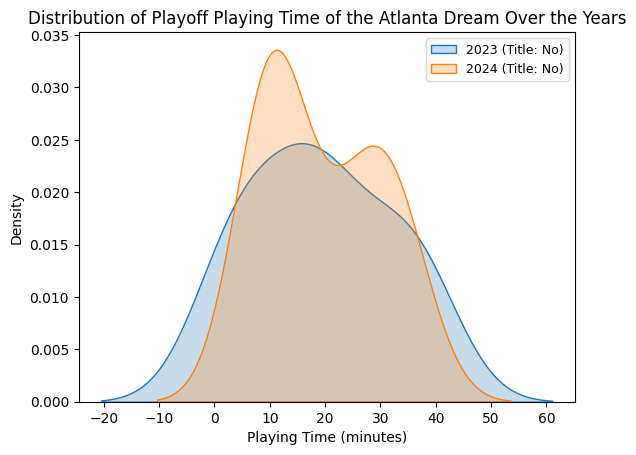

In [ ]:
df_ATL_pf = df_min_pf[df_min_pf.index == 'ATL']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_ATL_pf['YEAR'].unique():
    title = df_ATL_pf[df_ATL_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_ATL_pf[df_ATL_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Atlanta Dream Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_ATL_pf
pf_ATL_sum0 = df_ATL_pf['MIN'][df_ATL_pf['YEAR'] == 2020].describe()
pf_ATL_sum1 = df_ATL_pf['MIN'][df_ATL_pf['YEAR'] == 2021].describe()
pf_ATL_sum2 = df_ATL_pf['MIN'][df_ATL_pf['YEAR'] == 2022].describe()
pf_ATL_sum3 = df_ATL_pf['MIN'][df_ATL_pf['YEAR'] == 2023].describe()
pf_ATL_sum4 = df_ATL_pf['MIN'][df_ATL_pf['YEAR'] == 2024].describe()

# merge horizontally
pf_ATL_sum = pd.concat([pf_ATL_sum0, pf_ATL_sum1, pf_ATL_sum2, pf_ATL_sum3, pf_ATL_sum4], axis=1)

# Change column names
pf_ATL_sum.columns = ['2020', '2021', '2022', '2023', '2024']

#drop NA columns
pf_ATL_sum = pf_ATL_sum.dropna(axis=1)
pf_ATL_sum

,2023,2024
count,11.000000,11.000000
mean,19.118182,19.309091
std,12.733014,10.321381
min,3.200000,8.800000
25%,9.500000,10.400000
50%,18.200000,14.800000
75%,28.500000,28.100000
max,37.400000,34.400000


# Chicago Sky

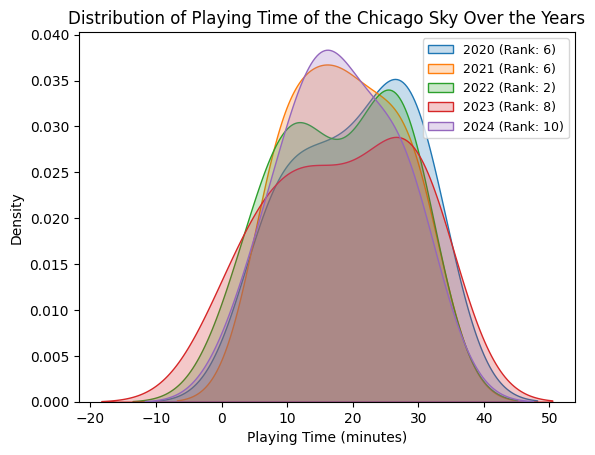

In [ ]:
df_CHI = df_min[df_min.index == 'CHI']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_CHI['YEAR'].unique():
    rank = df_CHI[df_CHI['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_CHI[df_CHI['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# find and graph the peaks
peaks = df_CHI.groupby('YEAR')['MIN'].idxmax()
for peak in peaks:
    year = df_CHI.loc[peak, 'YEAR']



# Add labels and title
plt.title('Distribution of Playing Time of the Chicago Sky Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_CHI by year
df_CHI_sum0 = df_CHI['MIN'][df_CHI['YEAR'] == 2020].describe()
df_CHI_sum1 = df_CHI['MIN'][df_CHI['YEAR'] == 2021].describe()
df_CHI_sum2 = df_CHI['MIN'][df_CHI['YEAR'] == 2022].describe()
df_CHI_sum3 = df_CHI['MIN'][df_CHI['YEAR'] == 2023].describe()
df_CHI_sum4 = df_CHI['MIN'][df_CHI['YEAR'] == 2024].describe()

#merge dataframes horizontally
df_CHI_sum = pd.concat([df_CHI_sum0, df_CHI_sum1, df_CHI_sum2, df_CHI_sum3, df_CHI_sum4], axis=1)

# Change column names
df_CHI_sum.columns = ['2020', '2021', '2022', '2023', '2024']
df_CHI_sum

,2020,2021,2022,2023,2024
count,12.000000,14.000000,14.000000,13.000000,14.000000
mean,20.208333,18.792857,17.892857,18.430769,18.192857
std,9.106387,8.144698,9.191423,10.706648,8.471442
min,6.500000,7.600000,2.700000,0.900000,3.300000
25%,13.325000,11.900000,11.200000,9.300000,13.125000
50%,21.500000,18.350000,18.900000,19.800000,17.500000
75%,27.650000,26.200000,26.450000,29.700000,25.450000
max,31.500000,30.800000,28.800000,31.200000,32.500000


Their playing time distributions for the regular season between their best season (2022) and their worst season (2024) are quite different. The distribution of playing time in 2022 was bimodal with peaks in minutes around 28 and 10 minutes. This indicates a mix of traditional “star” players who are on the floor for more minutes at a time and “role/bench”  players who act more as support players. In this year, the Sky appeared to rely more on their star players as that peak is higher than that of the role players. This could indicate a lack of trust in the bench or the high caliber play from the team's best players. In 2024, their worst season as of late, the Sky played more players giving out fewer minutes to in the process. This could indicate a rebuilding year for the team. The Sky could be trying to foster more players at once and get them more experience. In fact, the Sky received two first round draft picks in Angel Reese and Kamilla Cardoso in 2024 and the distribution of playing time alludes to the potential strategy to foster the chemistry and experience in this young team. The average number of minutes played per game that year was 18.19.

## Playoffs

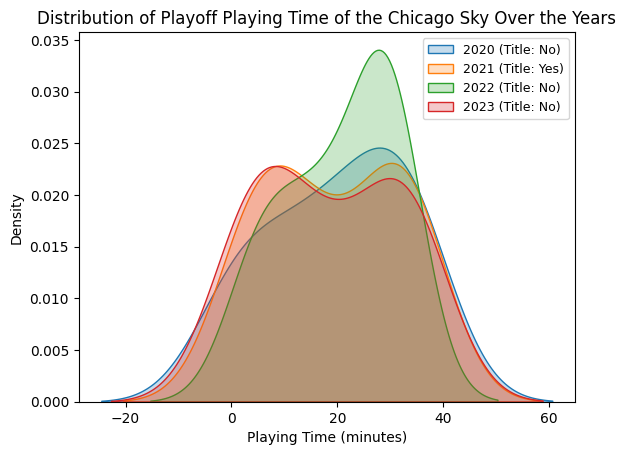

In [ ]:
df_CHI_pf = df_min_pf[df_min_pf.index == 'CHI']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_CHI_pf['YEAR'].unique():
    title = df_CHI_pf[df_CHI_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_CHI_pf[df_CHI_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Chicago Sky Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_CHI by year
pf_CHI_sum0 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2020].describe()
pf_CHI_sum1 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2021].describe()
pf_CHI_sum2 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2022].describe()
pf_CHI_sum3 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2023].describe()
pf_CHI_sum4 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2024].describe()

#merge dataframes horizontally
pf_CHI_sum = pd.concat([pf_CHI_sum0, pf_CHI_sum1, pf_CHI_sum2, pf_CHI_sum3, pf_CHI_sum4], axis=1)

# Change column names
pf_CHI_sum.columns = ['2020', '2021', '2022', '2023', '2024']

#drop NA columns
pf_CHI_sum = pf_CHI_sum.dropna(axis=1)

pf_CHI_sum

,2020,2021,2022,2023
count,10.000000,11.000000,10.000000,11.000000
mean,19.990000,19.236364,20.500000,18.463636
std,13.197597,12.701517,10.369292,13.062869
min,0.400000,3.100000,4.300000,1.500000
25%,10.725000,7.400000,13.100000,5.900000
50%,21.500000,16.800000,23.500000,18.000000
75%,31.075000,32.550000,29.300000,32.450000
max,35.600000,34.400000,30.600000,34.500000


However, Chicago’s best playoff run was in 2021, the team entered the playoffs as the 6th seed and came out with a championship. Their distribution in playing time from the regular season into the playoffs saw a dramatic shift. The team went from a narrow single-peaked distribution to a more uniform, bimodal distribution. The number of minutes played 25th percentile in the regular season was 11.9 compared to the 25th percentile in the playoffs’ 7.4. Similarly the 75th percentile of playing time in the regular season was 26.2 compared to 32.55 in the playoffs.  The Sky changed their strategy entering the playoffs and relied proportionally on their star and bench players. Their stars consistently played around 25-30 minutes compared to the bench’s 5-10 minutes. The bimodal shape of the distribution also reflects the consistency of playing time among the players.

# Connecticut Sun

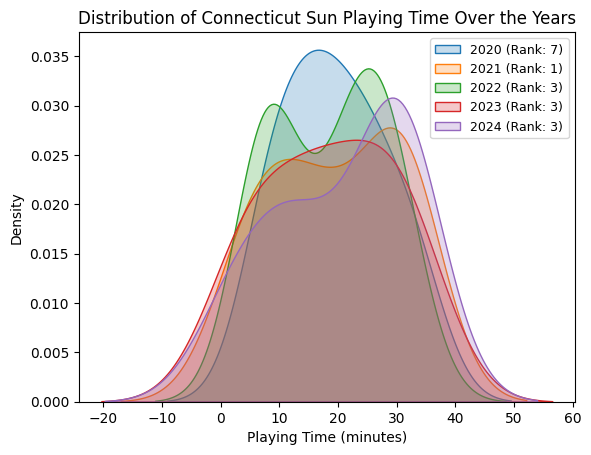

In [ ]:
df_CON = df_min[df_min.index == 'CON']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_CON['YEAR'].unique():
    rank = df_CON[df_CON['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_CON[df_CON['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Connecticut Sun Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_CON by year
df_CON_sum0 = df_CON['MIN'][df_CON['YEAR'] == 2020].describe()
df_CON_sum1 = df_CON['MIN'][df_CON['YEAR'] == 2021].describe()
df_CON_sum2 = df_CON['MIN'][df_CON['YEAR'] == 2022].describe()
df_CON_sum3 = df_CON['MIN'][df_CON['YEAR'] == 2023].describe()
df_CON_sum4 = df_CON['MIN'][df_CON['YEAR'] == 2024].describe()

#merge dataframes horizontally
df_CON_sum = pd.concat([df_CON_sum0, df_CON_sum1, df_CON_sum2, df_CON_sum3, df_CON_sum4], axis=1)

# Change column names
df_CON_sum.columns = ['2020', '2021', '2022', '2023', '2024']
df_CON_sum

,2020,2021,2022,2023,2024
count,12.000000,12.000000,15.000000,13.000000,11.000000
mean,19.466667,19.525000,18.320000,18.615385,20.681818
std,8.858312,11.053188,9.426649,11.360593,11.589807
min,7.000000,3.200000,5.300000,0.100000,1.800000
25%,12.900000,9.050000,9.050000,7.900000,12.250000
50%,18.250000,18.750000,20.800000,17.200000,27.200000
75%,25.650000,30.300000,25.750000,27.000000,30.250000
max,33.300000,31.900000,32.100000,36.100000,32.400000


The Connecticut Sun finished with their worst ranking in the past 5 years in 2020 at 7th. The distribution was bell-shaped and peaked around 15 minutes. The next 4 years show multiple peaks, with the highest around 30 minutes and the lower peak less than 10 minutes. This shows that there is unequal playing time on this team with some people playing close to full games and others barely leaving the bench. This strategy appears to work for the Sun as they won the league in 2021 and have placed 3rd in the years since.

## Playoffs

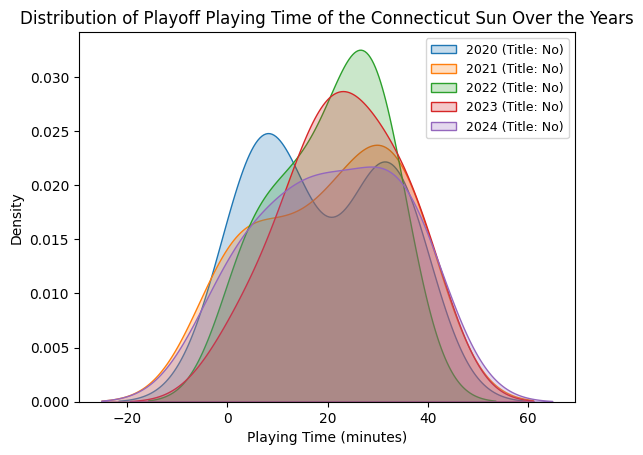

In [ ]:
df_CON_pf = df_min_pf[df_min_pf.index == 'CON']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_CON_pf['YEAR'].unique():
    title = df_CON_pf[df_CON_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_CON_pf[df_CON_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Connecticut Sun Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_CON by year
pf_CON_sum0 = df_CON_pf['MIN'][df_CON_pf['YEAR'] == 2020].describe()
pf_CON_sum1 = df_CON_pf['MIN'][df_CON_pf['YEAR'] == 2021].describe()
pf_CON_sum2 = df_CON_pf['MIN'][df_CON_pf['YEAR'] == 2022].describe()
pf_CON_sum3 = df_CON_pf['MIN'][df_CON_pf['YEAR'] == 2023].describe()
pf_CON_sum4 = df_CON_pf['MIN'][df_CON_pf['YEAR'] == 2024].describe()

#merge dataframes horizontally
df_CON_sum = pd.concat([pf_CON_sum0, pf_CON_sum1, pf_CON_sum2, pf_CON_sum3, pf_CON_sum4], axis=1)

# Change column names
df_CON_sum.columns = ['2020', '2021', '2022', '2023', '2024']
df_CON_sum

,2020,2021,2022,2023,2024
count,11.000000,11.000000,10.000000,9.000000,10.000000
mean,18.754545,20.363636,20.380000,23.166667,20.590000
std,13.101554,13.916341,10.577733,11.548593,13.821839
min,2.600000,0.700000,4.200000,2.900000,1.000000
25%,7.750000,8.300000,14.000000,15.400000,11.450000
50%,12.300000,23.300000,23.750000,22.000000,19.500000
75%,32.150000,34.150000,27.075000,30.900000,33.375000
max,35.000000,35.100000,33.500000,38.800000,38.700000


# Dallas Wings

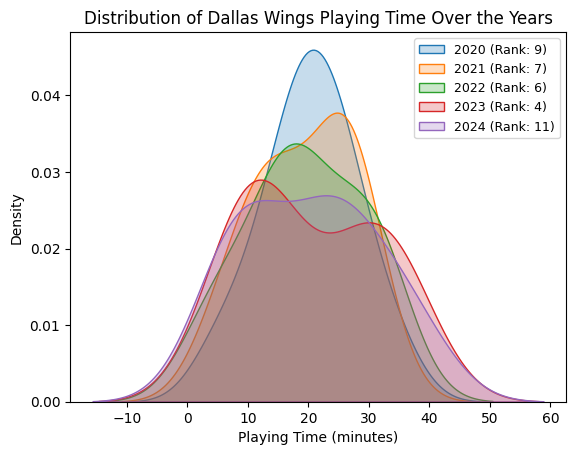

In [ ]:
df_DAL = df_min[df_min.index == 'DAL']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_DAL['YEAR'].unique():
    rank = df_DAL[df_DAL['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_DAL[df_DAL['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Dallas Wings Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_DAL by year
df_DAL_sum0 = df_DAL['MIN'][df_DAL['YEAR'] == 2020].describe()
df_DAL_sum1 = df_DAL['MIN'][df_DAL['YEAR'] == 2021].describe()
df_DAL_sum2 = df_DAL['MIN'][df_DAL['YEAR'] == 2022].describe()
df_DAL_sum3 = df_DAL['MIN'][df_DAL['YEAR'] == 2023].describe()
df_DAL_sum4 = df_DAL['MIN'][df_DAL['YEAR'] == 2024].describe()

#merge dataframes horizontally
df_DAL_sum = pd.concat([df_DAL_sum0, df_DAL_sum1, df_DAL_sum2, df_DAL_sum3, df_DAL_sum4], axis=1)

# Change column names
df_DAL_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_DAL_sum

,2020,2021,2022,2023,2024
count,12.000000,12.000000,12.000000,11.000000,12.000000
mean,20.258333,19.333333,19.450000,20.427273,20.091667
std,7.795390,8.460425,9.604592,11.229345,11.097048
min,5.300000,4.600000,4.600000,6.200000,4.600000
25%,16.025000,12.900000,14.550000,11.400000,9.850000
50%,19.900000,20.450000,18.650000,16.400000,21.900000
75%,25.525000,25.575000,28.300000,30.400000,26.525000
max,34.000000,31.400000,32.900000,37.200000,38.600000


The distribution of playing time in 2020 was incredibly steep and peaked around 20 minutes, indicating that most players saw half of the game. The team finished 9th this year, showing it might not be a great strategy. The distributions continually get flatter as years go on, indicating that some players are seeing higher average playing times and others are seeing lower averages. From 2021 to 2023, the Wings increased their ranking each year, only to fall to 11th in 2024.

## Playoffs

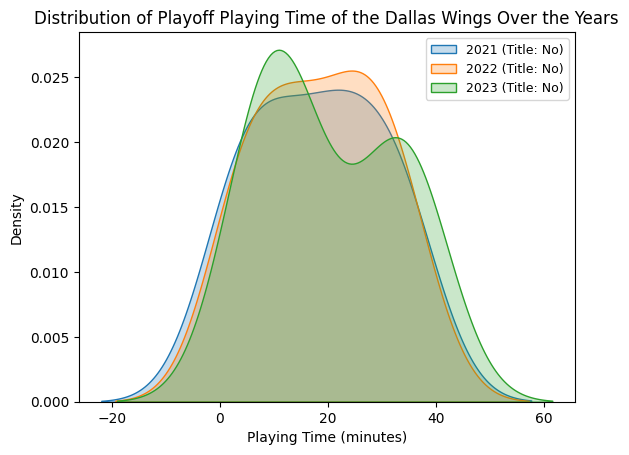

In [ ]:
df_DAL_pf = df_min_pf[df_min_pf.index == 'DAL']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_DAL_pf['YEAR'].unique():
    title = df_DAL_pf[df_DAL_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_DAL_pf[df_DAL_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Dallas Wings Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_DAL_pf by year
pf_DAL_sum0 = df_DAL_pf['MIN'][df_DAL_pf['YEAR'] == 2020].describe()
pf_DAL_sum1 = df_DAL_pf['MIN'][df_DAL_pf['YEAR'] == 2021].describe()
pf_DAL_sum2 = df_DAL_pf['MIN'][df_DAL_pf['YEAR'] == 2022].describe()
pf_DAL_sum3 = df_DAL_pf['MIN'][df_DAL_pf['YEAR'] == 2023].describe()
pf_DAL_sum4 = df_DAL_pf['MIN'][df_DAL_pf['YEAR'] == 2024].describe()

# merge horizontally
pf_DAL_sum = pd.concat([pf_DAL_sum0, pf_DAL_sum1, pf_DAL_sum2, pf_DAL_sum3, pf_DAL_sum4], axis=1)

pf_CHI_sum0 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2020].describe()
pf_CHI_sum1 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2021].describe()
pf_CHI_sum2 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2022].describe()
pf_CHI_sum3 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2023].describe()
pf_CHI_sum4 = df_CHI_pf['MIN'][df_CHI_pf['YEAR'] == 2024].describe()

#merge dataframes horizontally
pf_CHI_sum = pd.concat([pf_CHI_sum0, pf_CHI_sum1, pf_CHI_sum2, pf_CHI_sum3, pf_CHI_sum4], axis=1)

# Change column names
pf_CHI_sum.columns = ['2020', '2021', '2022', '2023', '2024']

#drop NA columns
pf_CHI_sum = pf_CHI_sum.dropna(axis=1)

pf_CHI_sum


# Indiana Fever

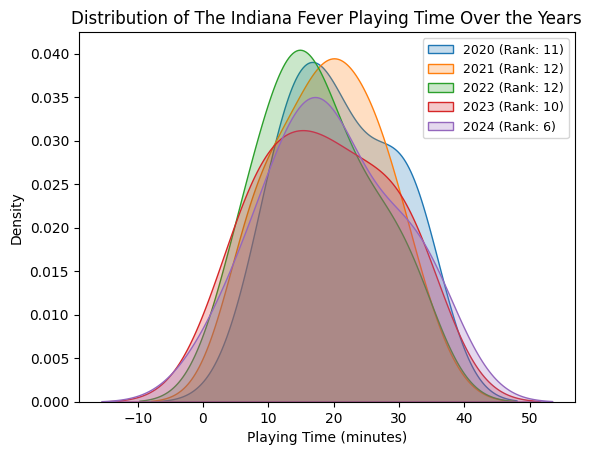

In [ ]:
df_IND = df_min[df_min.index == 'IND']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_IND['YEAR'].unique():
    rank = df_IND[df_IND['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_IND[df_IND['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of The Indiana Fever Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_IND by year
df_IND_sum0 = df_IND['MIN'][df_IND['YEAR'] == 2020].describe()
df_IND_sum1 = df_IND['MIN'][df_IND['YEAR'] == 2021].describe()
df_IND_sum2 = df_IND['MIN'][df_IND['YEAR'] == 2022].describe()
df_ind_sum3 = df_IND['MIN'][df_IND['YEAR'] == 2023].describe()
df_IND_sum4 = df_IND['MIN'][df_IND['YEAR'] == 2024].describe()

#merge dataframes horizontally
df_IND_sum = pd.concat([df_IND_sum0, df_IND_sum1, df_IND_sum2, df_ind_sum3, df_IND_sum4], axis=1)

#rename columns
df_IND_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_IND_sum

,2020,2021,2022,2023,2024
count,11.000000,13.000000,14.000000,12.000000,12.000000
mean,20.981818,19.115385,17.621429,18.700000,19.441667
std,8.295519,8.155555,8.566049,9.826772,9.898068
min,8.600000,6.700000,5.400000,3.600000,2.500000
25%,14.200000,14.700000,12.825000,10.400000,13.125000
50%,20.200000,20.000000,16.300000,18.700000,18.550000
75%,28.300000,26.500000,23.150000,27.225000,26.250000
max,32.600000,33.100000,32.600000,33.700000,35.400000


The 2024 WNBA season saw the Indiana Fever have their best performance in recent years. The team ended the regular season in 6th place and made the playoffs for the first time in eight years. Their best season had their athletes playing an average of 19.44 minutes and showed a narrow unimodal distribution. This showcases the organization’s strategy of having their players play a similar amount of time. They only have a few players who average more than 19.44 minutes and only a few who average less. The distribution shows less distinguishable groupings than other teams. However, this does not appear to be a new tactic for the Fever. 2024 had a similar distribution of playing time compared to previous seasons indicating a growth in chemistry and ability to work together as a team. There were no drastic changes in terms of playing time thus indicating that there must have been a change in the caliber of players the fever brought in and/or the cohesion of the team on the court.


## Playoffs

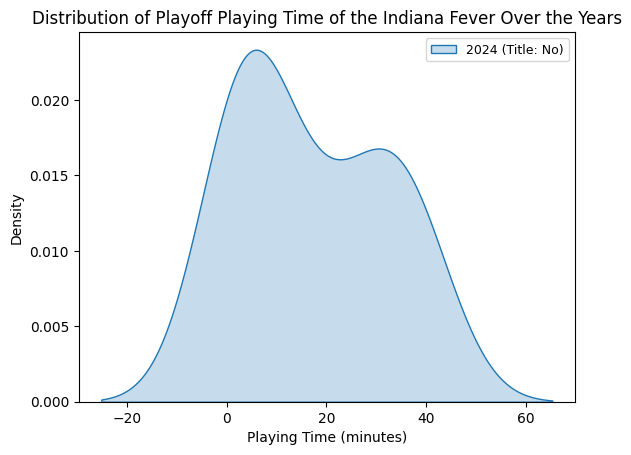

In [ ]:
df_IND_pf = df_min_pf[df_min_pf.index == 'IND']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_IND_pf['YEAR'].unique():
    title = df_IND_pf[df_IND_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_IND_pf[df_IND_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Indiana Fever Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_IND_pf by year
pf_IND_sum0 = df_IND_pf['MIN'][df_IND_pf['YEAR'] == 2020].describe()
pf_IND_sum1 = df_IND_pf['MIN'][df_IND_pf['YEAR'] == 2021].describe()
pf_IND_sum2 = df_IND_pf['MIN'][df_IND_pf['YEAR'] == 2022].describe()
pf_IND_sum3 = df_IND_pf['MIN'][df_IND_pf['YEAR'] == 2023].describe()
pf_IND_sum4 = df_IND_pf['MIN'][df_IND_pf['YEAR'] == 2024].describe()

# merge horizontally
pf_IND_sum = pd.concat([pf_IND_sum0, pf_IND_sum1, pf_IND_sum2, pf_IND_sum3, pf_IND_sum4], axis=1)

# Change column names
pf_IND_sum.columns = ['2020', '2021', '2022', '2023', '2024']

#drop NA columns
pf_IND_sum = pf_IND_sum.dropna(axis=1)

pf_IND_sum

,2024
count,12.000000
mean,17.091667
std,14.720700
min,1.700000
25%,4.025000
50%,12.800000
75%,30.500000
max,38.500000


# Las Vegas Aces

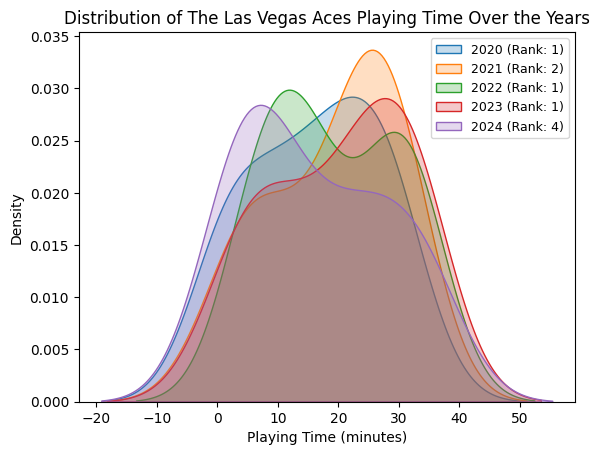

In [ ]:
df_LVA = df_min[df_min.index == 'LVA']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_LVA['YEAR'].unique():
    rank = df_LVA[df_LVA['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_LVA[df_LVA['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of The Las Vegas Aces Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_LVA by year
df_LVA_sum0 = df_LVA['MIN'][df_LVA['YEAR'] == 2020].describe()
df_LVA_sum1 = df_LVA['MIN'][df_LVA['YEAR'] == 2021].describe()
df_LVA_sum2 = df_LVA['MIN'][df_LVA['YEAR'] == 2022].describe()
df_LVA_sum3 = df_LVA['MIN'][df_LVA['YEAR'] == 2023].describe()
df_LVA_sum4 = df_LVA['MIN'][df_LVA['YEAR'] == 2024].describe()

# merge dataframes horizontally
df_LVA_sum = pd.concat([df_LVA_sum0, df_LVA_sum1, df_LVA_sum2, df_LVA_sum3, df_LVA_sum4], axis=1)

# rename columns
df_LVA_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_LVA_sum


,2020,2021,2022,2023,2024
count,13.000000,13.000000,12.000000,11.000000,15.000000
mean,16.200000,19.123077,19.308333,20.063636,16.000000
std,10.698442,10.707019,10.541818,11.364354,12.023667
min,0.400000,0.100000,5.800000,2.900000,1.800000
25%,8.100000,8.900000,11.575000,10.150000,5.550000
50%,17.400000,23.800000,16.650000,22.500000,11.500000
75%,25.800000,26.000000,29.775000,31.100000,25.150000
max,31.700000,31.900000,33.200000,32.400000,34.400000


The Aces have been one of the premier teams in the WNBA over the last few years finishing the regular season in first place three of the last five years. Their worst performance in recent years was in 2024 in which they finished the regular season in fourth place. During this time, they had fewer players who played large minutes and more who played fewer minutes. Their 2024 distribution was also one of their widest. It has the largest standard deviation of the Aces last five seasons at 12.023667 minutes. This could indicate a lack of consistency in minutes played or the coach’s want to extend minutes to her bench players and provide them with valuable experience. A wide range of playing times could also indicate injuries and the coaches attempt to fill the gaps of those players.  

## Playoffs

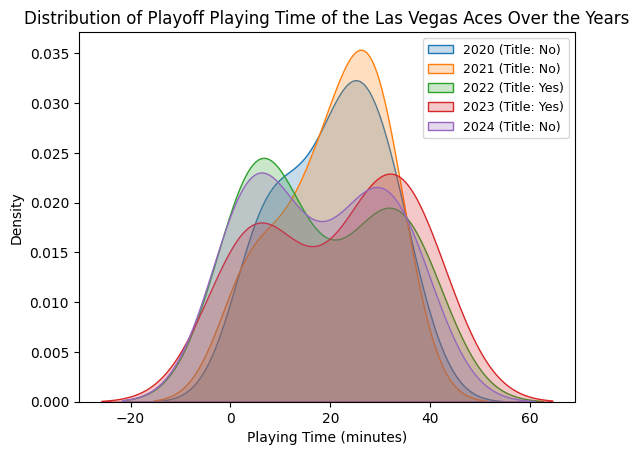

In [ ]:
df_LVA_pf = df_min_pf[df_min_pf.index == 'LVA']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_LVA_pf['YEAR'].unique():
    title = df_LVA_pf[df_LVA_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_LVA_pf[df_LVA_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Las Vegas Aces Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_LVA by year
pf_LVA_sum0 = df_LVA_pf['MIN'][df_LVA_pf['YEAR'] == 2020].describe()
pf_LVA_sum1 = df_LVA_pf['MIN'][df_LVA_pf['YEAR'] == 2021].describe()
pf_LVA_sum2 = df_LVA_pf['MIN'][df_LVA_pf['YEAR'] == 2022].describe()
pf_LVA_sum3 = df_LVA_pf['MIN'][df_LVA_pf['YEAR'] == 2023].describe()
pf_LVA_sum4 = df_LVA_pf['MIN'][df_LVA_pf['YEAR'] == 2024].describe()

# merge the df horizontally
pf_LVA_sum = pd.concat([pf_LVA_sum0, pf_LVA_sum1, pf_LVA_sum2, pf_LVA_sum3, pf_LVA_sum4], axis=1)

# rename columns
pf_LVA_sum.columns = ['2020', '2021', '2022', '2023', '2024']

#drop NAs columns
pf_LVA_sum = pf_LVA_sum.dropna(axis=1)

pf_LVA_sum

,2020,2021,2022,2023,2024
count,11.000000,10.000000,12.000000,10.000000,12.000000
mean,20.354545,20.240000,18.283333,20.990000,17.900000
std,10.278946,10.195882,13.882614,14.609316,13.399525
min,4.800000,3.900000,3.900000,1.800000,2.700000
25%,12.050000,14.925000,4.975000,6.050000,4.275000
50%,22.100000,23.000000,14.400000,25.100000,17.750000
75%,27.450000,28.150000,33.475000,34.425000,30.875000
max,35.400000,32.100000,37.200000,36.800000,36.600000


That said, the Aces have won two championships in the last three years. Both years, in the playoffs, they had bimodal distributions. This again alludes to the strategy of playing the star players the majority of the game while sprinkling in role players to provide invaluable support. The bimodal distribution again implies that the coaches are consistent with the amount of minutes they hand out to each player. In 2020 and 2021, where they finished the regular season first and second respectively. However, the Aces did not come away with a championship either year (in 2021 they didn’t even make the title game) and their playoff playing time distributions are drastically different than when they did. Both years have extremely narrow distributions, with standard deviations of 10.278946 and 10.195882 respectively, and are unimodal distributions. This indicates that the Aces either relied too heavily on their star players and did not have the bench support necessary to win a championship or played their star players and bench players a similar amount, not effectively utilizing the weapons at their disposal.  
Las Vegas also didn’t win the championship in 2024 but did employ the same bimodal distribution of playing time as their previous, championship seasons. However, the Aces did enter the playoffs as the four seed. This could indicate the possible lack of cohesion in the regular season carrying over to the playoffs. Additionally, between 2023 and 2024, the team lost two-time league MVP and starter Candace Parker to retirement/injury leaving the team to fill the massive void she left. So while the bimodal playing time distribution proved very effective in 2022 and 2023, it didn’t translate to championship success in 2024.


# Los Angeles Sparks

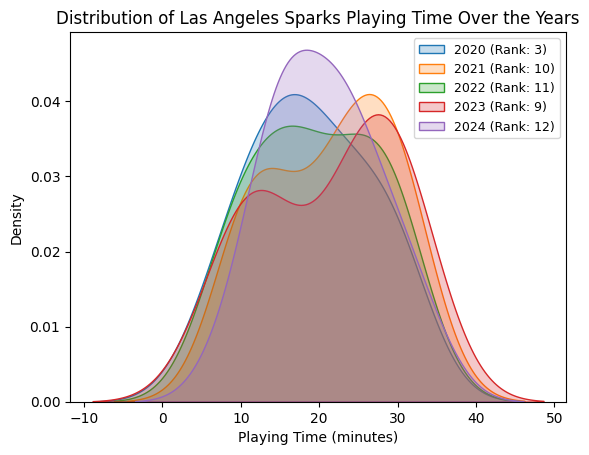

In [ ]:
df_LAS = df_min[df_min.index == 'LAS']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_LAS['YEAR'].unique():
    rank = df_LAS[df_LAS['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_LAS[df_LAS['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Las Angeles Sparks Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_LAS by year
df_LAS_sum0 = df_LAS['MIN'][df_LAS['YEAR'] == 2020].describe()
df_LAS_sum1 = df_LAS['MIN'][df_LAS['YEAR'] == 2021].describe()
df_LAS_sum2 = df_LAS['MIN'][df_LAS['YEAR'] == 2022].describe()
df_LAS_sum3 = df_LAS['MIN'][df_LAS['YEAR'] == 2023].describe()
df_LAS_sum4 = df_LAS['MIN'][df_LAS['YEAR'] == 2024].describe()

# merge dataframes horizontally
df_LAS_sum = pd.concat([df_LAS_sum0, df_LAS_sum1, df_LAS_sum2, df_LAS_sum3, df_LAS_sum4], axis=1)

# rename columns
df_LAS_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_LAS_sum

,2020,2021,2022,2023,2024
count,12.000000,12.000000,14.000000,13.000000,14.000000
mean,18.891667,21.333333,19.685714,21.269231,20.614286
std,7.824374,7.932939,7.970026,8.919677,6.998885
min,6.300000,10.000000,7.900000,7.100000,8.900000
25%,13.775000,13.125000,14.500000,12.800000,15.750000
50%,18.150000,22.900000,19.100000,24.700000,21.050000
75%,24.850000,28.050000,26.500000,28.600000,24.450000
max,30.600000,31.700000,31.400000,32.600000,33.700000


Above is the Los Angeles Sparks playing time distribution over the past 5 seasons. Also included is the final ranking the team finished at the end of each year. The Sparks had incredibly similar distributions in 2021 and 2023, but they finished near the bottom in both years. The team had a more uniform distribution in 2022 and 2024 but finished second-to-last and last in those years respectively. The only year they finished well was in 2020 where they finished 3rd. The distribution is uniform and peaks at lower average minutes than the rest of the distributions, indicating that the playing time was uniform on the team and that they relied more on their bench and subbed consistently.

## Playoffs

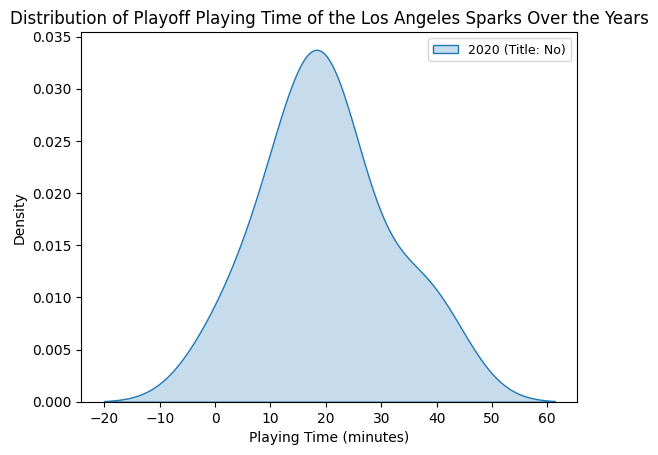

In [ ]:
df_LAS_pf = df_min_pf[df_min_pf.index == 'LAS']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_LAS_pf['YEAR'].unique():
    title = df_LAS_pf[df_LAS_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_LAS_pf[df_LAS_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Los Angeles Sparks Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary for 2020
df_LAS_sum0 = df_LAS['MIN'][df_LAS['YEAR'] == 2020].describe()
# rename column
df_LAS_sum0 = df_LAS_sum0.rename('2020')
df_LAS_sum0

,2020
count,12.000000
mean,18.891667
std,7.824374
min,6.300000
25%,13.775000
50%,18.150000
75%,24.850000
max,30.600000


# Minnesota Lynx

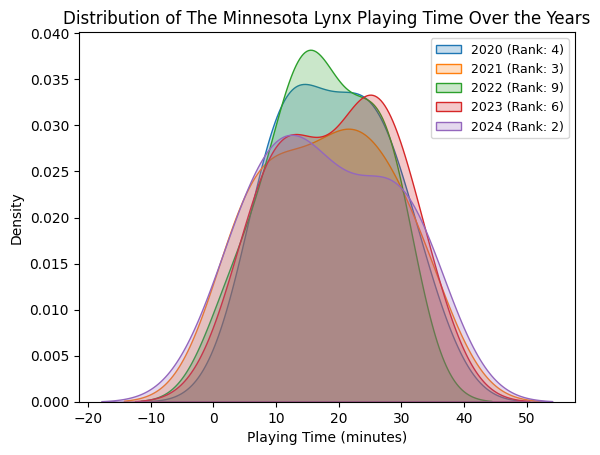

In [ ]:
df_MIN = df_min[df_min.index == 'MIN']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_MIN['YEAR'].unique():
    rank = df_MIN[df_MIN['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_MIN[df_MIN['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of The Minnesota Lynx Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_LVA by year
df_MIN_sum0 = df_MIN['MIN'][df_MIN['YEAR'] == 2020].describe()
df_MIN_sum1 = df_MIN['MIN'][df_MIN['YEAR'] == 2021].describe()
df_MIN_sum2 = df_MIN['MIN'][df_MIN['YEAR'] == 2022].describe()
df_MIN_sum3 = df_MIN['MIN'][df_MIN['YEAR'] == 2023].describe()
df_MIN_sum4 = df_MIN['MIN'][df_MIN['YEAR'] == 2024].describe()

# merge horizontally
df_MIN_sum = pd.concat([df_MIN_sum0, df_MIN_sum1, df_MIN_sum2, df_MIN_sum3, df_MIN_sum4], axis=1)

# rename columns
df_MIN_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_MIN_sum

,2020,2021,2022,2023,2024
count,13.000000,14.000000,16.000000,13.000000,13.000000
mean,19.161538,18.221429,17.512500,19.461538,18.161538
std,8.738377,10.271108,8.468835,9.412539,10.790315
min,5.600000,3.900000,3.000000,4.400000,1.500000
25%,12.500000,10.875000,11.600000,12.700000,10.100000
50%,18.500000,19.700000,17.100000,23.100000,16.100000
75%,25.800000,24.475000,26.100000,26.100000,26.500000
max,34.200000,34.600000,29.800000,33.500000,34.700000


The Minnesota Lynx are a historically good WNBA franchise and have made the playoffs four of the last five years. They also appear to have some of the most consistent distributions of playing time among WNBA teams in the last five years. All distributions are narrow and have one distinct peak. Excluding 2022, the average number of minutes per game played ranged from 18.16to 19.46 and the standard deviation ranged from 8.74 to 10.79 minutes per game. The 2022 season has the highest peak of all Lynx distributions at around 15 minutes per game. The Lynx therefore had more players playing fewer minutes than stars playing large minutes. This is to be expected because in 2022, the Lynx’s best player,  Napheesa Collier, who finished second in the MVP race in 2024, missed the majority of the season due to maternity leave. Therefore the Lynx had to adjust to her absence, playing more role players around 10-20 minutes a game. This rotation of players only playing 15 minutes a game may not allow them to “get their footing” and feel comfortable within lineups. The combination of this and the absence of their best player lead to the worst Lynx finish in the last five years: ending the season in ninth place and missing the playoffs all together.

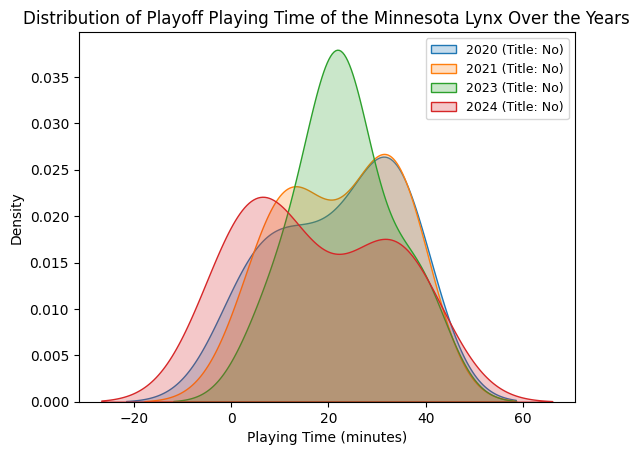

In [ ]:
df_MIN_pf = df_min_pf[df_min_pf.index == 'MIN']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_MIN_pf['YEAR'].unique():
    title = df_MIN_pf[df_MIN_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_MIN_pf[df_MIN_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Minnesota Lynx Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary
pf_MIN_sum0 = df_MIN_pf['MIN'][df_MIN_pf['YEAR'] == 2020].describe()
pf_MIN_sum1 = df_MIN_pf['MIN'][df_MIN_pf['YEAR'] == 2021].describe()
pf_MIN_sum3 = df_MIN_pf['MIN'][df_MIN_pf['YEAR'] == 2023].describe()
pf_MIN_sum4 = df_MIN_pf['MIN'][df_MIN_pf['YEAR'] == 2024].describe()

# merge horizontally
pf_MIN_sum = pd.concat([pf_MIN_sum0, pf_MIN_sum1, pf_MIN_sum3, pf_MIN_sum4], axis=1)

# rename columns
pf_MIN_sum.columns = ['2020', '2021', '2023', '2024']

pf_MIN_sum

,2020,2021,2023,2024
count,10.000000,9.000000,9.000000,12.000000
mean,21.930000,22.233333,23.266667,17.458333
std,12.767672,11.738292,9.903787,14.944775
min,2.500000,4.800000,7.200000,0.500000
25%,11.725000,11.600000,19.600000,4.425000
50%,24.000000,23.700000,23.100000,12.800000
75%,33.800000,32.400000,24.100000,30.525000
max,34.400000,35.400000,39.500000,38.800000


# New York Liberty

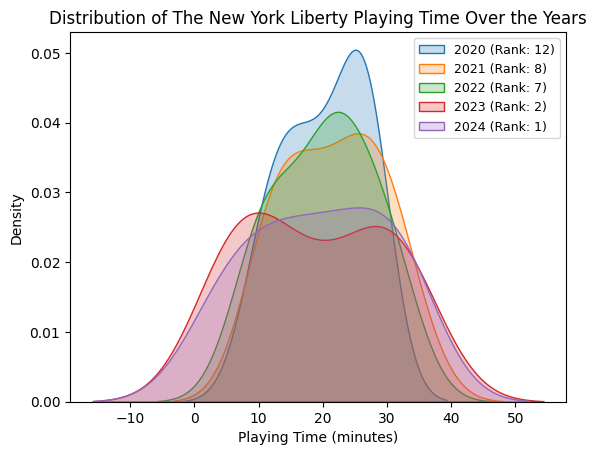

In [ ]:
df_NYL = df_min[df_min.index == 'NYL']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_NYL['YEAR'].unique():
    rank = df_NYL[df_NYL['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_NYL[df_NYL['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of The New York Liberty Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_NYL by year
df_NYL_sum0 = df_NYL['MIN'][df_NYL['YEAR'] == 2020].describe()
df_NYL_sum1 = df_NYL['MIN'][df_NYL['YEAR'] == 2021].describe()
df_NYL_sum2 = df_NYL['MIN'][df_NYL['YEAR'] == 2022].describe()
df_NYL_sum3 = df_NYL['MIN'][df_NYL['YEAR'] == 2023].describe()
df_NYL_sum4 = df_NYL['MIN'][df_NYL['YEAR'] == 2024].describe()


# merge horizontally
df_NYL_sum = pd.concat([df_NYL_sum0, df_NYL_sum1, df_NYL_sum2, df_NYL_sum3, df_NYL_sum4], axis=1)

# rename columns
df_NYL_sum.columns = ['2020', '2021', '2022', '2023', '2024']
df_NYL_sum

,2020,2021,2022,2023,2024
count,12.000000,11.000000,13.000000,12.000000,12.000000
mean,20.258333,21.654545,20.253846,18.758333,19.300000
std,6.437738,7.757495,7.721681,11.101061,10.619108
min,10.000000,11.200000,8.000000,4.400000,3.700000
25%,14.875000,15.300000,13.700000,7.700000,11.550000
50%,21.000000,22.500000,21.300000,18.100000,20.550000
75%,26.225000,27.800000,25.500000,30.100000,30.000000
max,27.500000,33.700000,32.300000,34.100000,32.700000


New York in 2020, 2021 and 2022 were consistently finishing towards the bottom of the rankings, 12th (last), 8th, and 7th respectively. Each of the corresponding regular season distributions are quite narrow and with peaks closer to 20-30 minutes a game. In 2020 especially, the highest peak was around 25 minutes a game. The average number of minutes played per game in 2020, 2021 and 2022 were 20.26, 21.65 and 20.25 respectively. Additionally, their respective standard deviations were 6.44, 7.76 and 7.72. This is a strong indication that the liberty relied heavily on a few players to take most of the minutes. However, they saw success in 2023 and 2024, finishing the season in 2nd and 1st respectively. These distributions are drastically different from the three previous. They are much wider with standard deviations of 11.101061 and 10.619108 respectively. Both the 2023 and 2024 were much more uniform, indicating that the team had some star players mixed in with a healthy amount of role players. Additionally, they relied on them equally and consistently.


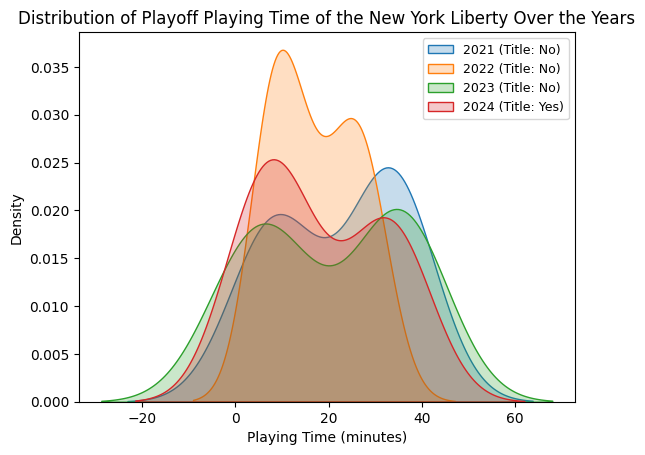

In [ ]:
df_NYL_pf = df_min_pf[df_min_pf.index == 'NYL']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_NYL_pf['YEAR'].unique():
    title = df_NYL_pf[df_NYL_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_NYL_pf[df_NYL_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the New York Liberty Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary
pf_NYL_sum1 = df_NYL_pf['MIN'][df_NYL_pf['YEAR'] == 2021].describe()
pf_NYL_sum2 = df_NYL_pf['MIN'][df_NYL_pf['YEAR'] == 2022].describe()
pf_NYL_sum3 = df_NYL_pf['MIN'][df_NYL_pf['YEAR'] == 2023].describe()
pf_NYL_sum4 = df_NYL_pf['MIN'][df_NYL_pf['YEAR'] == 2024].describe()

# merge horizontally
pf_NYL_sum = pd.concat([pf_NYL_sum1, pf_NYL_sum2, pf_NYL_sum3, pf_NYL_sum4], axis=1)

# rename columns
pf_NYL_sum.columns = ['2021', '2022', '2023', '2024']

pf_NYL_sum


,2021,2022,2023,2024
count,9.000000,12.000000,10.000000,12.000000
mean,22.222222,17.091667,20.610000,18.241667
std,13.592625,8.883126,15.846658,13.481331
min,3.100000,7.100000,1.200000,3.100000
25%,9.000000,8.850000,5.975000,6.675000
50%,29.200000,15.550000,22.050000,13.400000
75%,34.100000,24.850000,35.000000,31.400000
max,37.500000,30.900000,38.000000,37.400000


In both 2023 and 2024, the New York Liberty made it to the championship game, winning it in 2024. While their regular season distributions were quite uniform, their successful playoff distributions were again bimodal. During their title run, the liberty consistently played their star players more minutes while sprinkling in their role players. They relied equally on both groups with their stars consistently playing 25-45 (higher than 40 because two of the games went into overtime) and bench players playing 5-15 minutes per game.

# Phoenix Mercury

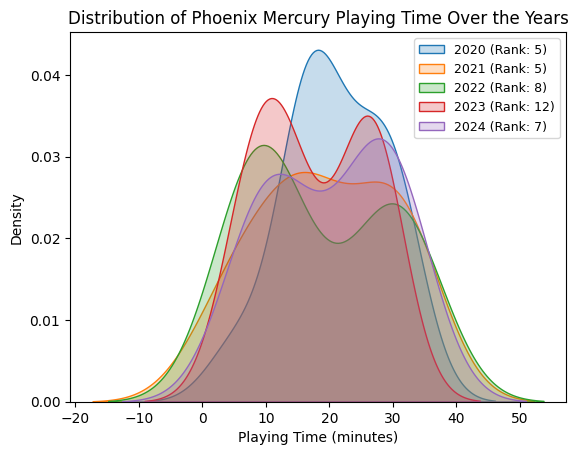

In [ ]:
df_PHO = df_min[df_min.index == 'PHO']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_PHO['YEAR'].unique():
    rank = df_PHO[df_PHO['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_PHO[df_PHO['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Phoenix Mercury Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary
df_PHO_sum0 = df_PHO['MIN'][df_PHO['YEAR'] == 2020].describe()
df_PHO_sum1 = df_PHO['MIN'][df_PHO['YEAR'] == 2021].describe()
df_PHO_sum2 = df_PHO['MIN'][df_PHO['YEAR'] == 2022].describe()
df_PHO_sum3 = df_PHO['MIN'][df_PHO['YEAR'] == 2023].describe()
df_PHO_sum4 = df_PHO['MIN'][df_PHO['YEAR'] == 2024].describe()

# merge horizontally
df_PHO_sum = pd.concat([df_PHO_sum0, df_PHO_sum1, df_PHO_sum2, df_PHO_sum3, df_PHO_sum4], axis=1)

# rename columns
df_PHO_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_PHO_sum

,2020,2021,2022,2023,2024
count,12.000000,12.000000,14.00000,16.000000,13.000000
mean,20.958333,19.458333,18.45000,17.625000,20.284615
std,7.822631,10.620260,11.13931,8.532956,9.815281
min,5.500000,2.100000,4.90000,5.600000,5.000000
25%,15.525000,13.150000,9.00000,10.425000,10.800000
50%,18.950000,17.500000,14.30000,15.500000,22.800000
75%,27.950000,29.075000,29.30000,26.300000,28.700000
max,31.800000,32.800000,34.00000,29.000000,33.300000


In 2020, the Phoenix Mercury had a high distribution of players avering around 20 minutes per game where they finished 5th. In 2021, they also finished 5th, but with a much flatter distribution and utilizing longer playing time for some players. 2022, 2023 and 2024 all seem to have two peaks, one around 10 minutes and one around 30 minutes,indicating that players either played most of the game or a small part. There were few that played about half of the game. Their ranking decrease as this pattern starts, finishing in 8th, 12th and 7th place in the past three years.

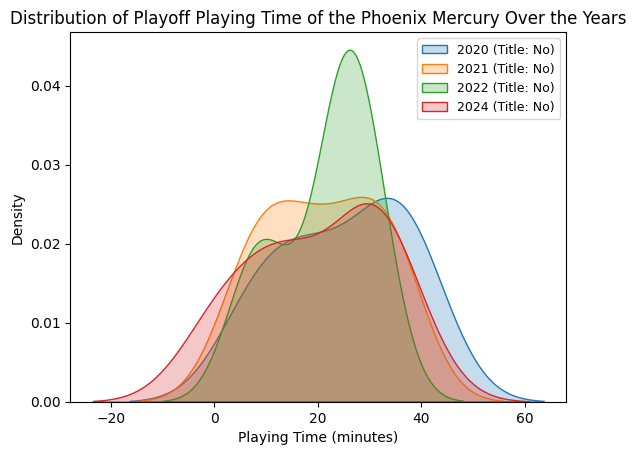

In [ ]:
df_PHO_pf = df_min_pf[df_min_pf.index == 'PHO']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_PHO_pf['YEAR'].unique():
    title = df_PHO_pf[df_PHO_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_PHO_pf[df_PHO_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Phoenix Mercury Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary
pf_PHO_sum0 = df_PHO_pf['MIN'][df_PHO_pf['YEAR'] == 2020].describe()
pf_PHO_sum1 = df_PHO_pf['MIN'][df_PHO_pf['YEAR'] == 2021].describe()
pf_PHO_sum2 = df_PHO_pf['MIN'][df_PHO_pf['YEAR'] == 2022].describe()
pf_PHO_sum4 = df_PHO_pf['MIN'][df_PHO_pf['YEAR'] == 2024].describe()

# merge horizontally
pf_PHO_sum = pd.concat([pf_PHO_sum0, pf_PHO_sum1, pf_PHO_sum2, pf_PHO_sum4], axis=1)

# rename columns
pf_PHO_sum.columns = ['2020', '2021', '2022', '2024']

pf_PHO_sum

,2020,2021,2022,2024
count,8.000000,11.000000,10.000000,10.000000
mean,25.000000,20.918182,21.300000,20.060000
std,12.288671,11.092053,8.896566,12.927249
min,8.000000,5.100000,6.900000,1.000000
25%,16.800000,11.250000,15.075000,13.300000
50%,26.250000,21.900000,24.100000,21.850000
75%,35.300000,31.000000,26.600000,29.675000
max,39.300000,35.100000,31.200000,36.400000


# Seattle Storm

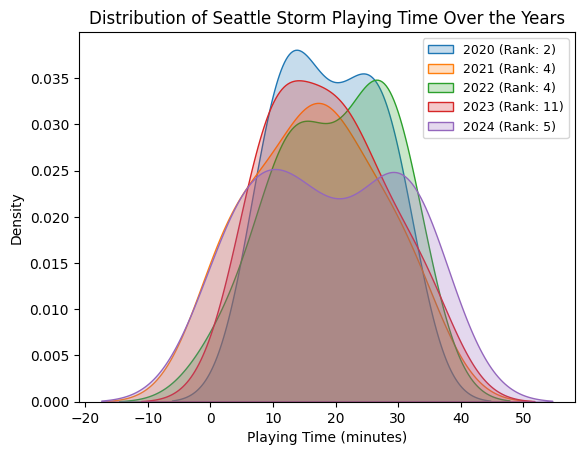

In [ ]:
df_SEA = df_min[df_min.index == 'SEA']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_SEA['YEAR'].unique():
    rank = df_SEA[df_SEA['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_SEA[df_SEA['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Seattle Storm Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary
df_SEA_sum0 = df_SEA['MIN'][df_SEA['YEAR'] == 2020].describe()
df_SEA_sum1 = df_SEA['MIN'][df_SEA['YEAR'] == 2021].describe()
df_SEA_sum2 = df_SEA['MIN'][df_SEA['YEAR'] == 2022].describe()
df_SEA_sum3 = df_SEA['MIN'][df_SEA['YEAR'] == 2023].describe()
df_SEA_sum4 = df_SEA['MIN'][df_SEA['YEAR'] == 2024].describe()

# merge horizontally
df_SEA_sum = pd.concat([df_SEA_sum0, df_SEA_sum1, df_SEA_sum2, df_SEA_sum3, df_SEA_sum4], axis=1)

# rename columns
df_SEA_sum.columns = ['2020', '2021', '2022', '2023', '2024']

df_SEA_sum

,2020,2021,2022,2023,2024
count,12.000000,14.000000,12.000000,14.000000,13.000000
mean,19.075000,16.821429,19.775000,18.707143,18.761538
std,7.862006,10.162842,9.257147,9.263449,11.660084
min,8.200000,1.200000,2.300000,5.300000,3.500000
25%,13.150000,9.350000,12.275000,10.525000,8.500000
50%,18.750000,16.550000,20.800000,19.400000,15.800000
75%,25.100000,23.775000,27.025000,23.975000,30.700000
max,30.400000,33.300000,30.900000,35.400000,33.700000


The Seattle Storm do not follow any consistent patterns in their playing time distributions. In 2020, they finished 2nd and had a very narrow distribution around 20 minutes. In 2021, they had a much wider distribution, inidcating more variation in playing time. In 2022, they had significant peaks around 30 minutes and a narrower distribution once again. In 2023, they follow more of the pattern from 2021, which saw them their worst ranking by far in the last 5 years. Finally in 2024, the distribution is much flatter and spread out, indicating players had different playing time averages all across the team.

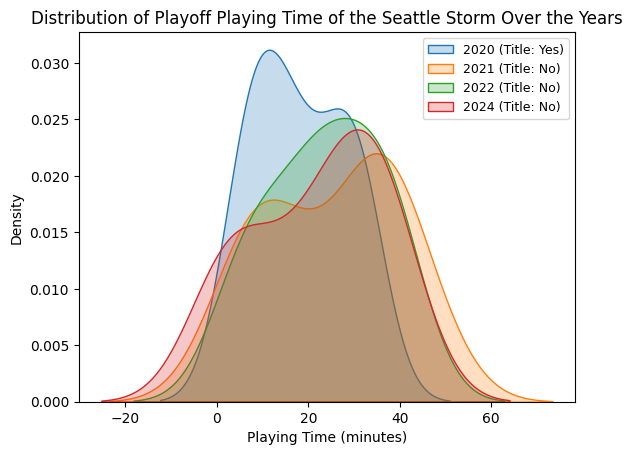

In [ ]:
df_SEA_pf = df_min_pf[df_min_pf.index == 'SEA']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_SEA_pf['YEAR'].unique():
    title = df_SEA_pf[df_SEA_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_SEA_pf[df_SEA_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Seattle Storm Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary
pf_SEA_sum0 = df_SEA_pf['MIN'][df_SEA_pf['YEAR'] == 2020].describe()
pf_SEA_sum1 = df_SEA_pf['MIN'][df_SEA_pf['YEAR'] == 2021].describe()
pf_SEA_sum2 = df_SEA_pf['MIN'][df_SEA_pf['YEAR'] == 2022].describe()
pf_SEA_sum4 = df_SEA_pf['MIN'][df_SEA_pf['YEAR'] == 2024].describe()

# merge horizontally
pf_SEA_sum = pd.concat([pf_SEA_sum0, pf_SEA_sum1, pf_SEA_sum2, pf_SEA_sum4], axis=1)

# rename columns
pf_SEA_sum.columns = ['2020', '2021', '2022', '2024']

pf_SEA_sum

,2020,2021,2022,2024
count,12.000000,9.000000,9.000000,10.000000
mean,18.208333,24.988889,23.622222,21.920000
std,10.028546,14.651147,12.384746,14.194428
min,5.900000,4.700000,5.700000,1.600000
25%,9.850000,10.300000,15.500000,9.500000
50%,16.550000,30.700000,25.300000,25.600000
75%,27.475000,36.000000,35.600000,34.550000
max,32.600000,45.000000,38.900000,37.100000


The storm won the championship in 2020 when they entered the playoffs as the two seed. During their successful 2020 run, they had a large number of players playing around 5-15 minutes per game with fewer playing between 20 and 35 minutes. Additionally, in 2020, their regular season distribution did not change much in shape when the team entered the playoffs. This is most likely due to how the 2020 season was structured. The COVID-19 pandemic was running rampant during this time and therefore, the 2020 WNBA season was a condensed and isolated season. Instead of the normal 40 regular season games, the 2020 “Bubble” season was only 20 games. Because there were less games played in the regular seasons, teams did not need to manage the workload of their star players as much as they would in a season that is double in length. This meant that their lineups could be more consistent in playing time because there was less concern for long-term fatigue. Therefore, the distributions of the regular season and playoffs look more similar to each other than other seasons.

# Washington Mystics

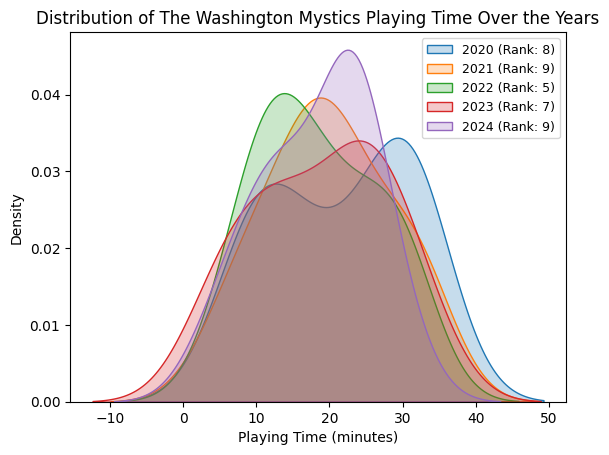

In [ ]:
df_WAS = df_min[df_min.index == 'WAS']

# Create the distribution plot for 'min' column by year
fig, ax = plt.subplots()  # Create figure and axes object

for year in df_WAS['YEAR'].unique():
    rank = df_WAS[df_WAS['YEAR'] == year]['RANK'].iloc[0]
    sns.kdeplot(
        data=df_WAS[df_WAS['YEAR'] == year],
        x='MIN',
        label=f"{year} (Rank: {rank})",  # Include rank in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of The Washington Mystics Playing Time Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# find the 5 number summary for df_WAS by year
df_WAS_sum0 = df_WAS['MIN'][df_WAS['YEAR'] == 2020].describe()
df_WAS_sum1 = df_WAS['MIN'][df_WAS['YEAR'] == 2021].describe()
df_WAS_sum2 = df_WAS['MIN'][df_WAS['YEAR'] == 2022].describe()
df_WAS_sum3 = df_WAS['MIN'][df_WAS['YEAR'] == 2023].describe()
df_WAS_sum4 = df_WAS['MIN'][df_WAS['YEAR'] == 2024].describe()


# merge horizontally
df_WAS_sum = pd.concat([df_WAS_sum0, df_WAS_sum1, df_WAS_sum2, df_WAS_sum3, df_WAS_sum4], axis=1)
df_WAS_sum


,MIN,MIN,MIN,MIN,MIN
count,11.000000,14.000000,14.000000,14.000000,14.000000
mean,21.536364,19.857143,18.278571,18.835714,18.164286
std,9.452013,8.538394,8.215481,9.308690,7.592568
min,9.400000,5.200000,5.800000,4.100000,4.000000
25%,11.750000,15.575000,12.825000,11.900000,13.375000
50%,21.800000,19.300000,17.100000,20.350000,20.800000
75%,30.250000,25.125000,25.200000,25.100000,23.275000
max,31.700000,33.300000,31.300000,32.400000,29.900000


Over the last five seasons the Washington Mystics have had average at best regular seasons. There is not much consistency among their distributions. Most of them are unimodal with the exception of 2020. 2024 saw their highest peak indicating not much variation in the number of minutes each player plays per game.The 2021 season has an almost symmetrical distribution heavily implying that the team did not rely on any star players and instead played many players an average amount of minutes per game. Their best regular season finish was fifth place in 2022. During this year, the distribution was right skewed indicating that they had some players playing large minutes while most played around ten per game.

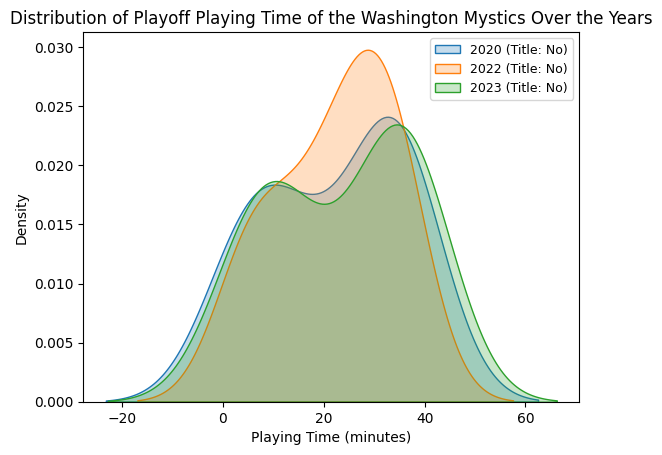

In [ ]:
df_WAS_pf = df_min_pf[df_min_pf.index == 'WAS']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_WAS_pf['YEAR'].unique():
    title = df_WAS_pf[df_WAS_pf['YEAR'] == year]['CHAMP'].iloc[0]
    sns.kdeplot(
        data=df_WAS_pf[df_WAS_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} (Title: {title})",  # Include title in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time of the Washington Mystics Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')


# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary
pf_WAS_sum0 = df_WAS_pf['MIN'][df_WAS_pf['YEAR'] == 2020].describe()
pf_WAS_sum2 = df_WAS_pf['MIN'][df_WAS_pf['YEAR'] == 2022].describe()
pf_WAS_sum3 = df_WAS_pf['MIN'][df_WAS_pf['YEAR'] == 2023].describe()

# merge horizontally
pf_WAS_sum = pd.concat([pf_WAS_sum0, pf_WAS_sum2, pf_WAS_sum3], axis=1)

# rename columns
pf_WAS_sum.columns = ['2020', '2022', '2023']

pf_WAS_sum

,2020,2022,2023
count,9.000000,9.000000,9.000000
mean,22.222222,22.222222,23.600000
std,13.804327,11.501606,14.122854
min,3.500000,5.300000,4.500000
25%,11.100000,14.500000,11.000000
50%,26.700000,25.500000,29.400000
75%,35.000000,32.800000,36.500000
max,35.800000,35.300000,38.900000


# Playoff Distribution for Title Winning Teams:

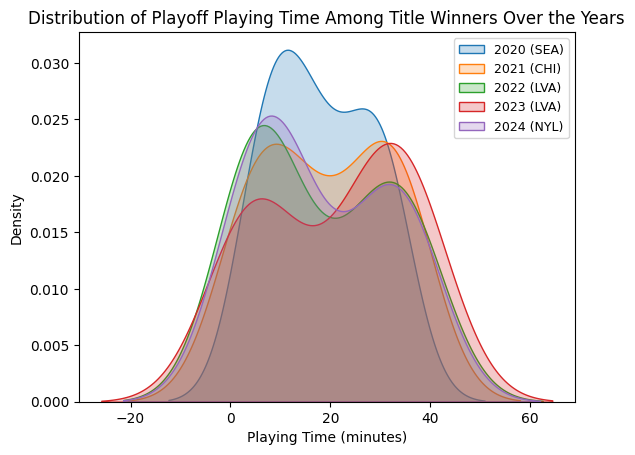

In [ ]:
df_title_pf = df_min_pf[df_min_pf['CHAMP'] == 'Yes']

fig, ax = plt.subplots()  # Create figure and axes object

for year in df_title_pf['YEAR'].unique():
    # Get the team name for the current year using .loc and the index
    team = df_title_pf.loc[df_title_pf['YEAR'] == year].index[0]
    sns.kdeplot(
        data=df_title_pf[df_title_pf['YEAR'] == year],
        x='MIN',
        label=f"{year} ({team})",  # Include team in label
        fill=True,
        common_norm=False,
        ax=ax  # Use the same axes
    )

# Add labels and title
plt.title('Distribution of Playoff Playing Time Among Title Winners Over the Years')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Density')

# Show the legend with reduced size
plt.legend(prop={'size': 9})  # Adjust the size value as needed

# Show the plot
plt.show()

In [ ]:
# 5 number summary
pf_title_sum0 = df_title_pf['MIN'][df_title_pf['YEAR'] == 2020].describe()
pf_title_sum1 = df_title_pf['MIN'][df_title_pf['YEAR'] == 2021].describe()
pf_title_sum2 = df_title_pf['MIN'][df_title_pf['YEAR'] == 2022].describe()
pf_title_sum3 = df_title_pf['MIN'][df_title_pf['YEAR'] == 2023].describe()
pf_title_sum4 = df_title_pf['MIN'][df_title_pf['YEAR'] == 2024].describe()

# merge horizontally
pf_title_sum = pd.concat([pf_title_sum0, pf_title_sum1, pf_title_sum2, pf_title_sum3, pf_title_sum4], axis = 1)

# rename columns
pf_title_sum.columns = ['2020', '2021', '2022', '2023', '2024']

pf_title_sum

,2020,2021,2022,2023,2024
count,12.000000,11.000000,12.000000,10.000000,12.000000
mean,18.208333,19.236364,18.283333,20.990000,18.241667
std,10.028546,12.701517,13.882614,14.609316,13.481331
min,5.900000,3.100000,3.900000,1.800000,3.100000
25%,9.850000,7.400000,4.975000,6.050000,6.675000
50%,16.550000,16.800000,14.400000,25.100000,13.400000
75%,27.475000,32.550000,33.475000,34.425000,31.400000
max,32.600000,34.400000,37.200000,36.800000,37.400000


In [ ]:
pf_title_sum.loc['std'].mean()

12.940664949597997

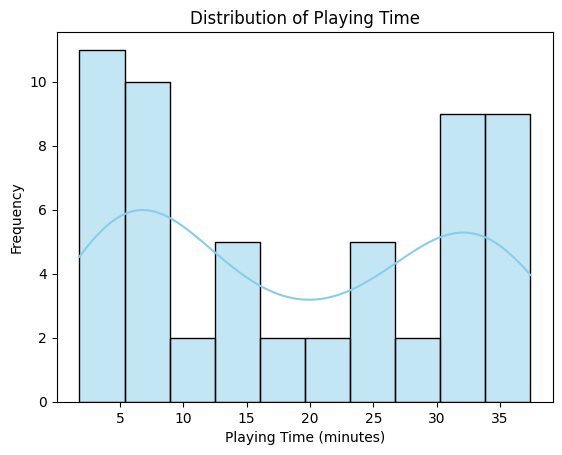

In [ ]:
# Create a histogram with seaborn
sns.histplot(df_title_pf['MIN'], kde=True, bins=10, color='skyblue')

# Add labels and title
plt.title('Distribution of Playing Time')
plt.xlabel('Playing Time (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The playoff playing time distributions are much more similar than the other two groups already examined. All distributions are bimodal with dense clusters/peaks around 10 minutes and 30 minutes per game. There are no peaks at 20 minutes per game, an attribute often seen in team’s regular season distributions, or among teams that performed poorly in the playoffs. Therefore, teams who consistently play their star players upwards of thirty minutes, assisted by role players who play between ten and fifteen minutes per game have proven to be extremely successful in the postseason.